In [1]:
import numpy
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
uvinitial = numpy.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

In [3]:
#différents paramètres donnent des résultats variés.
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
#Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
#Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
#Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
#Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
#Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
#Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
#Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
#Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish



In [7]:
#conditions initiales

n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1
dh = 5./(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

In [8]:
U = uvinitial['U']
V = uvinitial['V']
Usave=numpy.zeros((8302,192,192))
Vsave=numpy.zeros((8302,192,192))
Usave[0,:,:]=U[:,:]
Vsave[0,:,:]=V[:,:]

for t in range(nt):
    Uc=U.copy()
    Vc=V.copy()
    
    #centre matrice  
    U[1:-1,1:-1]=dt*(Du*((Uc[2:,1:-1]-2*Uc[1:-1,1:-1]+Uc[:-2,1:-1]\
                         +Uc[1:-1,2:]-2*Uc[1:-1,1:-1]+Uc[1:-1,:-2])/dh**2)\
                         -(Uc[1:-1,1:-1]*(Vc[1:-1,1:-1])**2)+F*(1-Uc[1:-1,1:-1]))+Uc[1:-1,1:-1]                
    V[1:-1,1:-1]=dt*(Dv*((Vc[2:,1:-1]-2*Vc[1:-1,1:-1]+Vc[:-2,1:-1]\
                         +Vc[1:-1,2:]-2*Vc[1:-1,1:-1]+Vc[1:-1,:-2])/dh**2)\
                         +(Uc[1:-1,1:-1]*(Vc[1:-1,1:-1])**2)-Vc[1:-1,1:-1]*(F+k))+Vc[1:-1,1:-1]
    
    
    #conditions de bords mises a jour:
    U[:,0]=U[:,1]
    U[:,-1]=U[:,-2]
    U[0,:]=U[1,:]
    U[-1,:]=U[-2,:]
    V[:,0]=V[:,1]
    V[:,-1]=V[:,-2]
    V[0,:]=V[1,:]
    V[-1,:]=V[-2,:]
    
    #sauve l'itération
    Usave[t+1,:,:]=U[:,:]
    Vsave[t+1,:,:]=V[:,:]
    

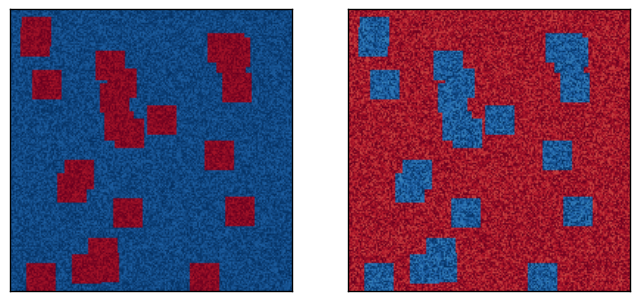

In [9]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(Usave[0,:,:], cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(Vsave[0,:,:], cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

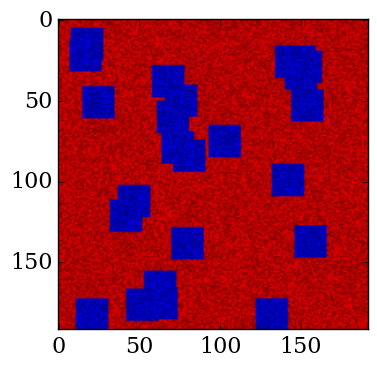

In [10]:
fig = plt.figure()
im = plt.imshow(Usave[0])

def Uanim(i):
    im.set_array(Usave[80*i])
    return  im

anim1 = animation.FuncAnimation(fig,Uanim,frames=range(100), interval=60)

HTML(anim1.to_html5_video())
